In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\Sachin's World\OneDrive\Documents\MIT\MentorMind\2nd_term\Train_data.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
data.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
data.shape

(48660, 14)

# Exploratory Data Analysis 

In [12]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


In [13]:
cat_feat=data.select_dtypes(include='object')
list(cat_feat.columns)

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [14]:
#Since we least bother of employee number for our analysis we are going to drop that coulumn
data.drop('employee_id',inplace=True,axis=1)


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
cat_col=['department','region', 'education', 'gender', 'recruitment_channel']
for i in cat_col:
    data[i]=le.fit_transform(data[i])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            48660 non-null  int32  
 1   region                48660 non-null  int32  
 2   education             48660 non-null  int32  
 3   gender                48660 non-null  int32  
 4   recruitment_channel   48660 non-null  int32  
 5   no_of_trainings       48660 non-null  int64  
 6   age                   48660 non-null  int64  
 7   previous_year_rating  48660 non-null  float64
 8   length_of_service     48660 non-null  int64  
 9   KPIs_met >80%         48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int32(5), int64(7)
memory usage: 4.3 MB


In [19]:
 data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


# Top 3 Important Factors effecting employee performance

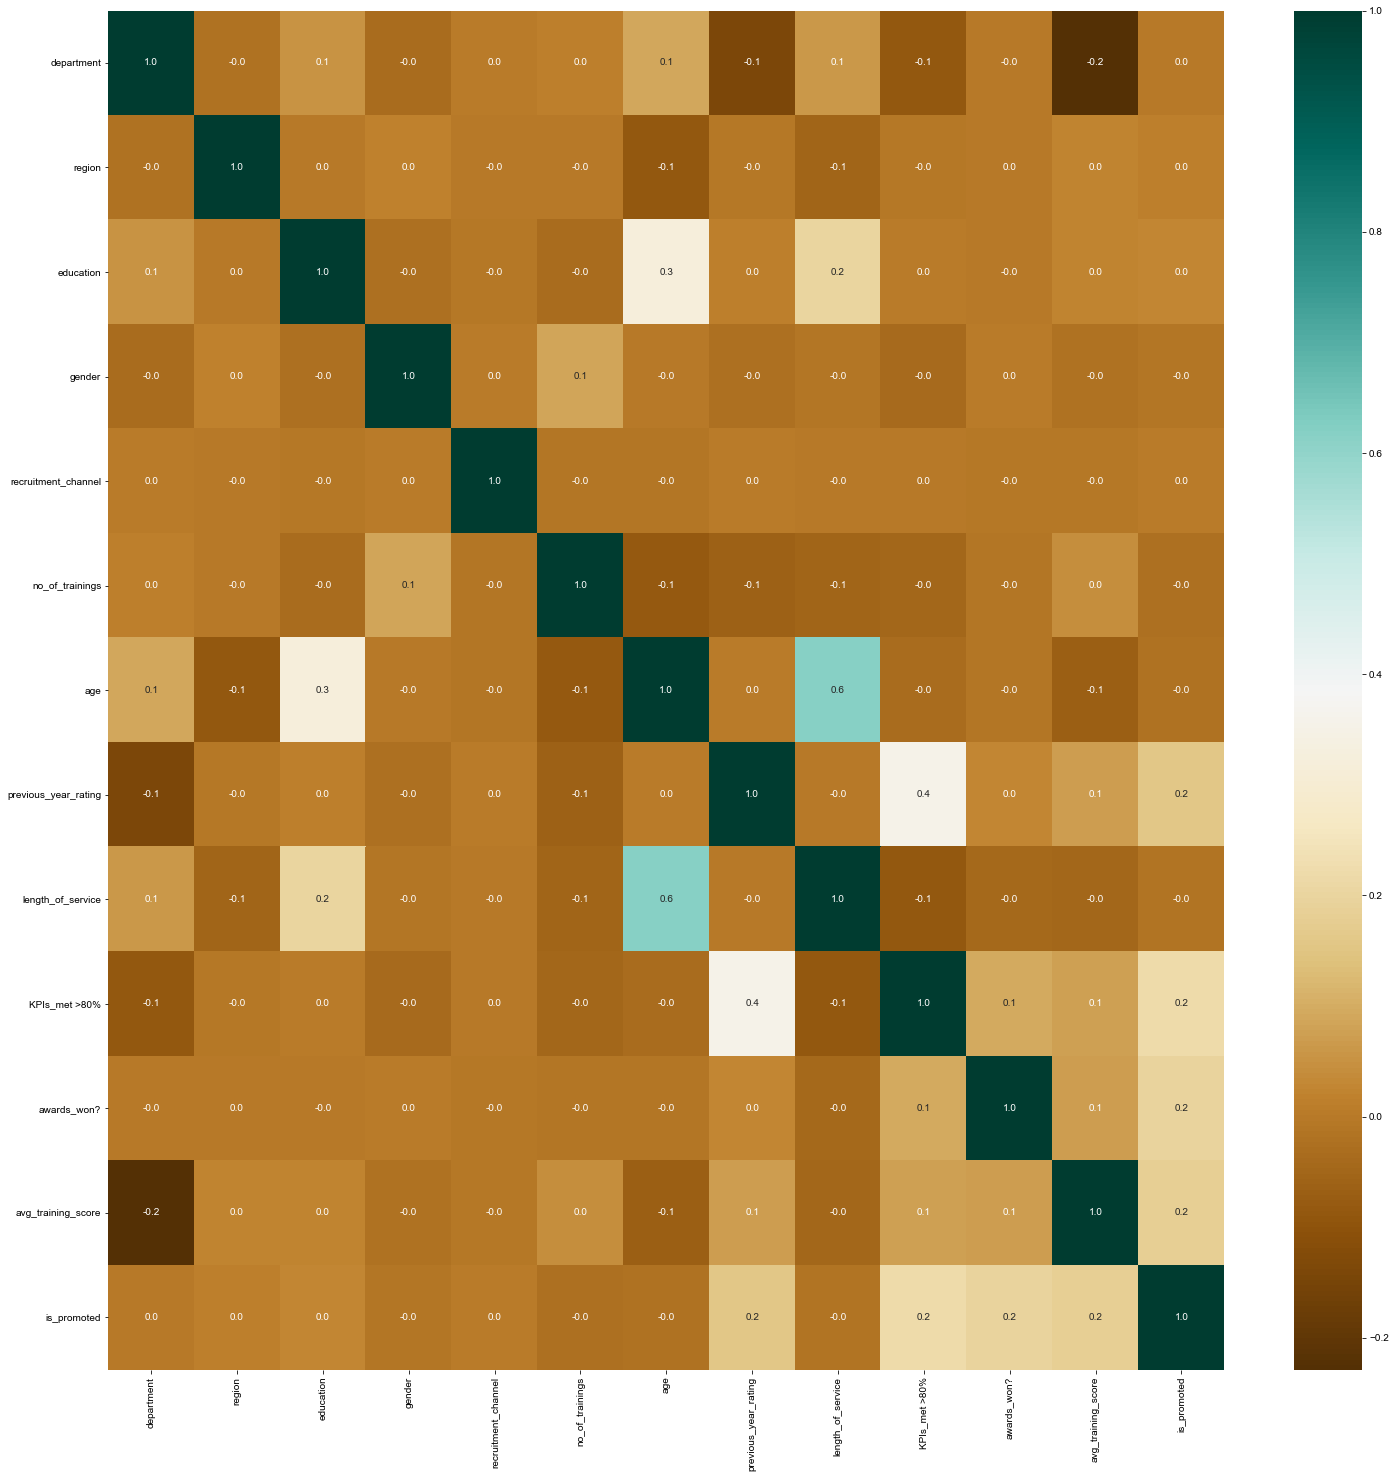

In [24]:
# heatmap
import seaborn as sns
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=3.25)
plt.show()

Since there are many variables, we obtain the correlation between variables by drawing a variable heat diagram. The heatmap can use color changes to reflect the data information in a two-dimensional matrix or table, and it can intuitively express the size of the data value in a defined color depth. The data is clustered as needed, and the clustered data is displayed on the heatmap, and the similarity and difference of the data are reflected by the color gradient and similarity.

In [25]:
## displays the correlated data 
corr_matrix = data.corr()
corr_matrix["is_promoted"].sort_values(ascending=False)

is_promoted             1.000000
KPIs_met >80%           0.219933
awards_won?             0.196971
avg_training_score      0.179494
previous_year_rating    0.158715
education               0.027633
region                  0.012016
recruitment_channel     0.003874
department              0.000990
gender                 -0.011909
length_of_service      -0.014267
age                    -0.022412
no_of_trainings        -0.025006
Name: is_promoted, dtype: float64

Here We can observe that, factors that are negatively correlated and positevely correlated. and Top 3 factors which affect the employee performance are
1)KPIs_met >80%
2)awards_won? 
3)avg_training_score

In [26]:
data.to_excel('processed_data.xls',index = False)